In [2]:
import os
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

def list_files_recursive(path):
  """Belirtilen yoldaki tüm dosya ve klasör isimlerini listeler."""
  for root, dirs, files in os.walk(path):
    print(f"Dizin: {root}")
    for file in files:
      print(f"  Dosya: {file}")
    for dir in dirs:
      print(f"  Klasör: {dir}")

# Veri yolunu belirtin
data_path = "/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset"

# Dosya ve klasörleri listeleyin
list_files_recursive(data_path)

Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset
  Klasör: VPN
  Klasör: Non VPN
Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN
  Klasör: SSTP
  Klasör: OpenVPN
  Klasör: PPTP
  Klasör: L2TP
  Klasör: WireGuard
  Klasör: L2TP IPsec
Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/SSTP
  Dosya: meet.json
  Dosya: mail.json
  Dosya: streaming.json
  Dosya: ssh.json
  Dosya: non_streaming.json
Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/OpenVPN
  Dosya: mail.json
  Dosya: meet.json
  Dosya: streaming.json
  Dosya: ssh.json
  Dosya: non_streaming.json
Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/PPTP
  Dosya: mail.json
  Dosya: meet.json
  Dosya: streaming.json
  Dosya: ssh.json
  Dosya: non_streaming.json
Dizin: /content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/L2TP
  Dosya: meet.json
  Dosya: mail.json
  Dosya: ssh.json
  Dosya: streaming.json
  Dosya: non_streaming.json
Dizin

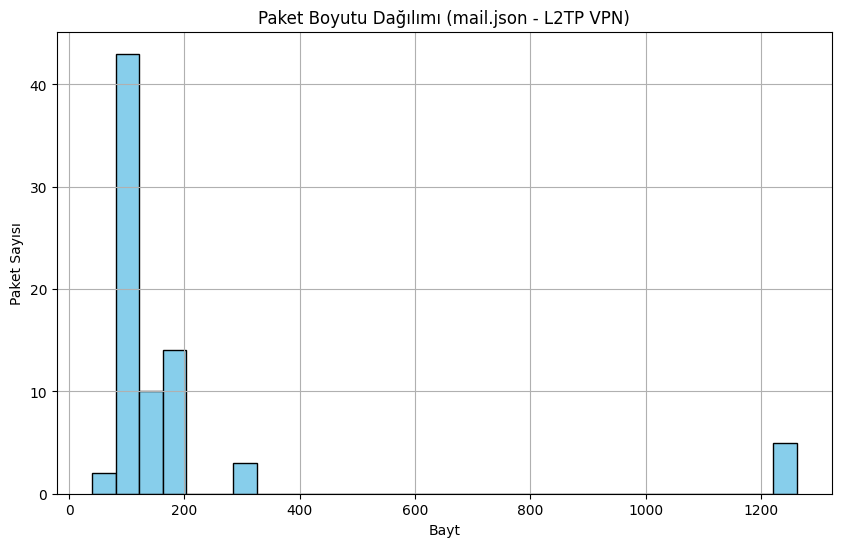

In [ ]:
import json
import matplotlib.pyplot as plt

# JSON dosyasını oku (mail.json yolunu kendi path'ine göre güncelle)
with open('/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/L2TP/ssh.json') as f:
    data = json.load(f)

# Tüm bytes değerlerini al
byte_sizes = []
for session in data:
    for packet in session.get("x_packets", []):
        try:
            size = int(packet["bytes"])
            if size > 0:  # negatif olanları filtrele
                byte_sizes.append(size)
        except:
            continue

# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(byte_sizes, bins=30, color='skyblue', edgecolor='black')
plt.title('Paket Boyutu Dağılımı (mail.json - L2TP VPN)')
plt.xlabel('Bayt')
plt.ylabel('Paket Sayısı')
plt.grid(True)
plt.show()


In [ ]:
!pip install ijson  # sadece ilk seferde çalıştır

import ijson
import random
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 7.7 MB/s eta 0:00:00


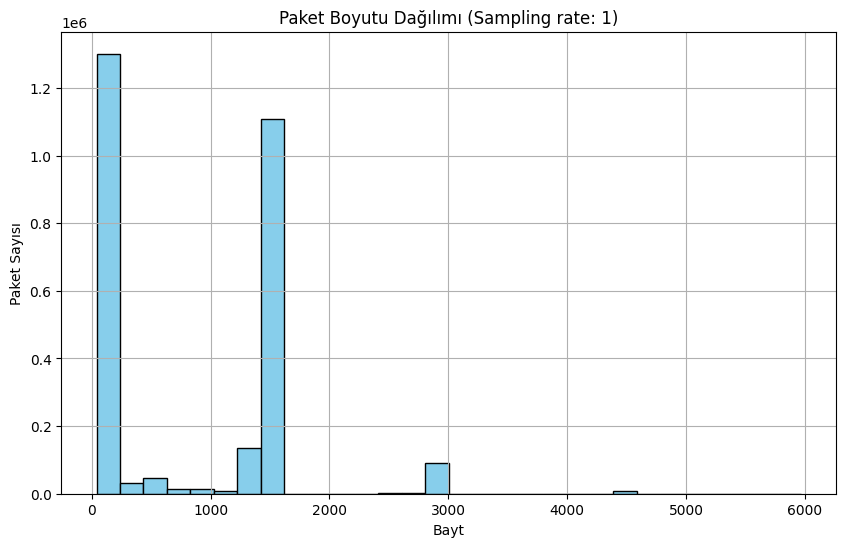

In [ ]:
# Örnekleme oranı (örneğin milyonda 1 = 0.000001)
sampling_rate = 1
byte_sizes = []

with open('/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN/L2TP/non_streaming.json', 'rb') as f:
    # ijson.items her bir JSON nesnesini tek tek çeker
    objects = ijson.items(f, 'item')
    for obj in objects:
        if random.random() < sampling_rate:
            for packet in obj.get("x_packets", []):
                try:
                    size = int(packet["bytes"])
                    if size > 0:
                        byte_sizes.append(size)
                except:
                    continue

# Eğer örnek yoksa uyarı ver
if not byte_sizes:
    print("Hiç örnek seçilemedi, sampling_rate değerini artır.")
else:
    # Histogram çiz
    plt.figure(figsize=(10, 6))
    plt.hist(byte_sizes, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Paket Boyutu Dağılımı (Sampling rate: {sampling_rate})')
    plt.xlabel('Bayt')
    plt.ylabel('Paket Sayısı')
    plt.grid(True)
    plt.show()

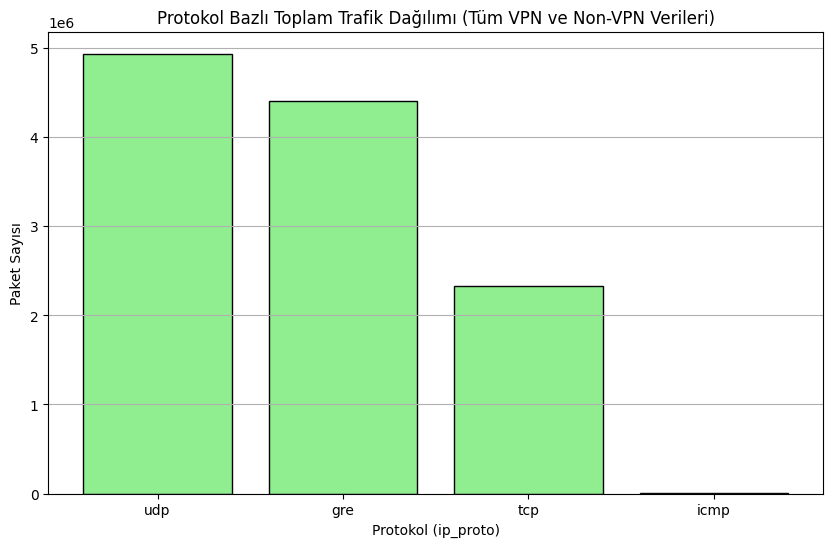

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'  # kendi path'inle değiştir
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

# === PROTOKOL SAYIM TABLOSU ===
# protokol sayısını saklayacağımız yapı: protokol -> sayı
protocol_counts = defaultdict(int)

# === DOSYALARI DOLAŞ ===
for vpn in vpn_types:
    for file_name in file_types:
        # yol belirle
        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        # dosya mevcut mu?
        if not os.path.isfile(full_path):
            continue

        # dosyayı oku ve protokol say
        try:
            with open(full_path) as f:
                data = json.load(f)

                for session in data:
                    proto = session.get('ip_proto', 'unknown')
                    packet_count = len(session.get('x_packets', []))
                    protocol_counts[proto] += packet_count
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
plt.figure(figsize=(10, 6))
protocols = list(protocol_counts.keys())
counts = list(protocol_counts.values())

plt.bar(protocols, counts, color='lightgreen', edgecolor='black')
plt.title('Protokol Bazlı Toplam Trafik Dağılımı (Tüm VPN ve Non-VPN Verileri)')
plt.xlabel('Protokol (ip_proto)')
plt.ylabel('Paket Sayısı')
plt.grid(axis='y')
plt.show()


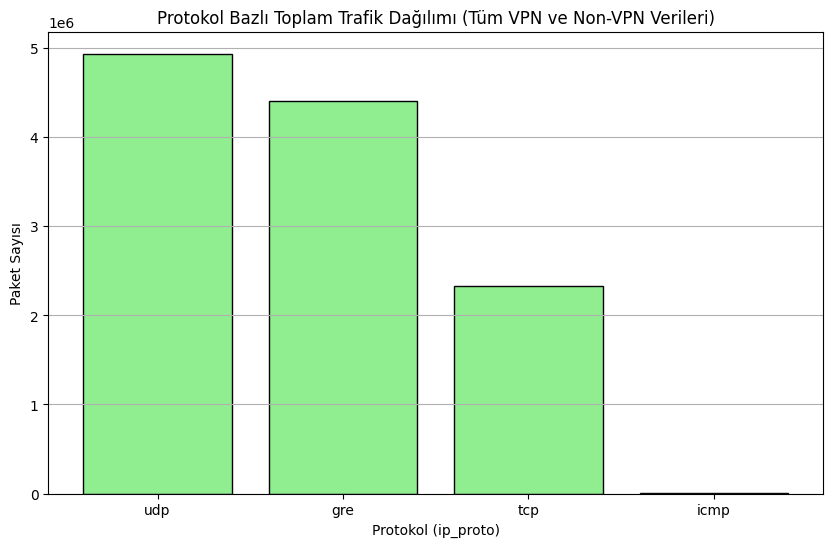

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import ijson
import random

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json', 'non_streaming.json']
sampling_rate = 0.0001  # non_streaming.json için örneklem oranı

# === PROTOKOL SAYIM TABLOSU ===
protocol_counts = defaultdict(int)

# === DOSYALARI DOLAŞ ===
for vpn in vpn_types:
    for file_name in file_types:
        # yol belirle
        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        # dosya mevcut mu?
        if not os.path.isfile(full_path):
            continue

        # dosyayı oku ve protokol say
        try:
            if file_name == 'non_streaming.json':  # non_streaming için örneklem al
                with open(full_path, 'rb') as f:
                    objects = ijson.items(f, 'item')
                    for obj in objects:
                        if random.random() < sampling_rate:
                            proto = obj.get('ip_proto', 'unknown')
                            packet_count = len(obj.get('x_packets', []))
                            protocol_counts[proto] += packet_count
            else:  # diğer dosyalar için normal okuma
                with open(full_path) as f:
                    data = json.load(f)
                    for session in data:
                        proto = session.get('ip_proto', 'unknown')
                        packet_count = len(session.get('x_packets', []))
                        protocol_counts[proto] += packet_count
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
plt.figure(figsize=(10, 6))
protocols = list(protocol_counts.keys())
counts = list(protocol_counts.values())

plt.bar(protocols, counts, color='lightgreen', edgecolor='black')
plt.title('Protokol Bazlı Toplam Trafik Dağılımı (Tüm VPN ve Non-VPN Verileri)')
plt.xlabel('Protokol (ip_proto)')
plt.ylabel('Paket Sayısı')
plt.grid(axis='y')
plt.show()

<ipython-input-4-621e1c65fce2>:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"))


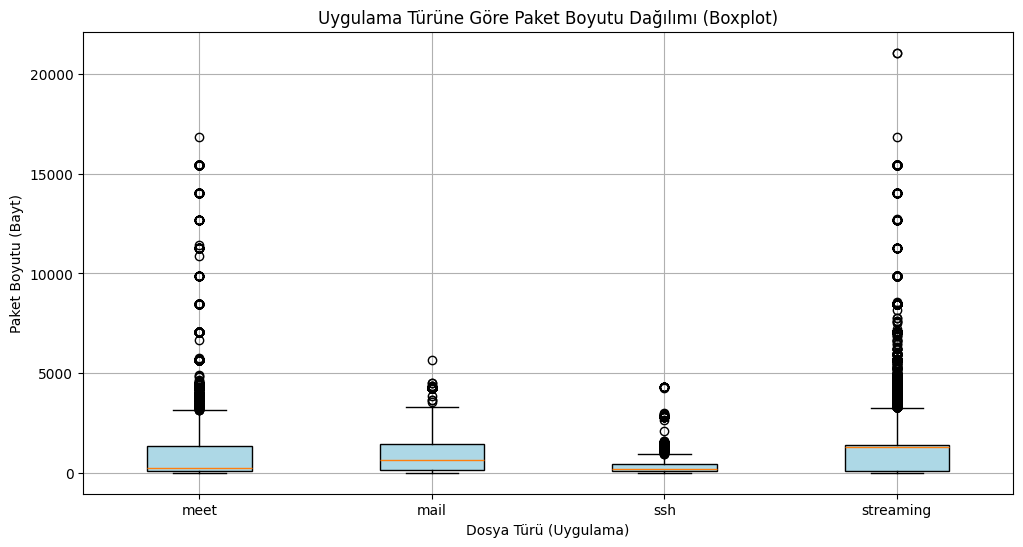

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json', 'non_streaming.json']

# === VERİ TOPLAMA ===
# dosya türüne göre byte listesi: file_name -> [bytes...]
file_bytes = defaultdict(list)

for vpn in vpn_types:
    for file_name in file_types:
        # yol belirle
        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        # dosya mevcut mu?
        if not os.path.isfile(full_path):
            continue

        # dosyayı oku ve bytes topla
        try:
            with open(full_path) as f:
                data = json.load(f)

                for session in data:
                    for packet in session.get("x_packets", []):
                        try:
                            size = int(packet["bytes"])
                            if size > 0:
                                file_bytes[file_name.replace('.json', '')].append(size)
                        except:
                            continue
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
plt.figure(figsize=(12, 6))
labels = list(file_bytes.keys())
data = [file_bytes[label] for label in labels]

plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"))
plt.title('Uygulama Türüne Göre Paket Boyutu Dağılımı (Boxplot)')
plt.xlabel('Dosya Türü (Uygulama)')
plt.ylabel('Paket Boyutu (Bayt)')
plt.grid(True)
plt.show()


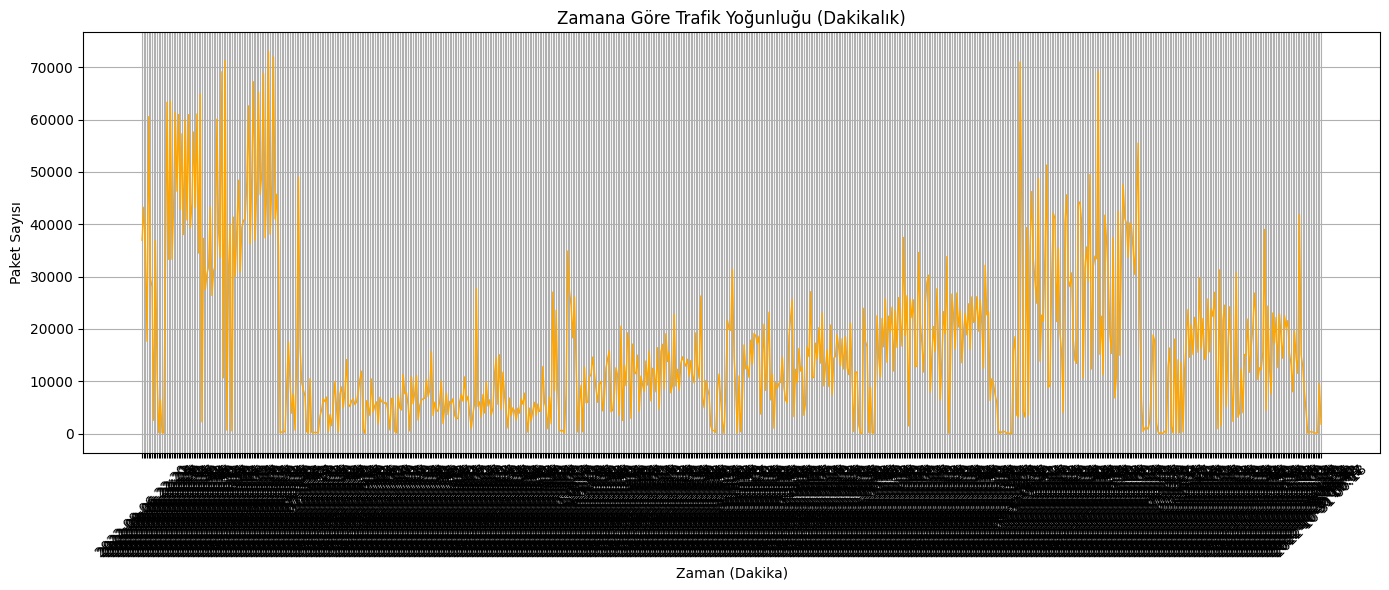

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

# === ZAMAN YOĞUNLUĞU HAZIRLIK ===
# dakika bazlı paket sayısı (zaman grubu -> toplam paket)
time_buckets = defaultdict(int)

for vpn in vpn_types:
    for file_name in file_types:
        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        if not os.path.isfile(full_path):
            continue

        try:
            with open(full_path) as f:
                data = json.load(f)

                for session in data:
                    for packet in session.get("x_packets", []):
                        try:
                            ts = packet.get("timestamp_start")
                            if not ts:
                                continue
                            dt = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f")
                            time_key = dt.strftime("%Y-%m-%d %H:%M")  # dakikalık grupla
                            time_buckets[time_key] += 1
                        except:
                            continue
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
# Zamanları sıralayıp grafik çiz
sorted_items = sorted(time_buckets.items(), key=lambda x: x[0])
x_vals = [item[0] for item in sorted_items]
y_vals = [item[1] for item in sorted_items]

plt.figure(figsize=(14, 6))
plt.plot(x_vals, y_vals, color='orange', linewidth=1)
plt.title('Zamana Göre Trafik Yoğunluğu (Dakikalık)')
plt.xlabel('Zaman (Dakika)')
plt.ylabel('Paket Sayısı')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


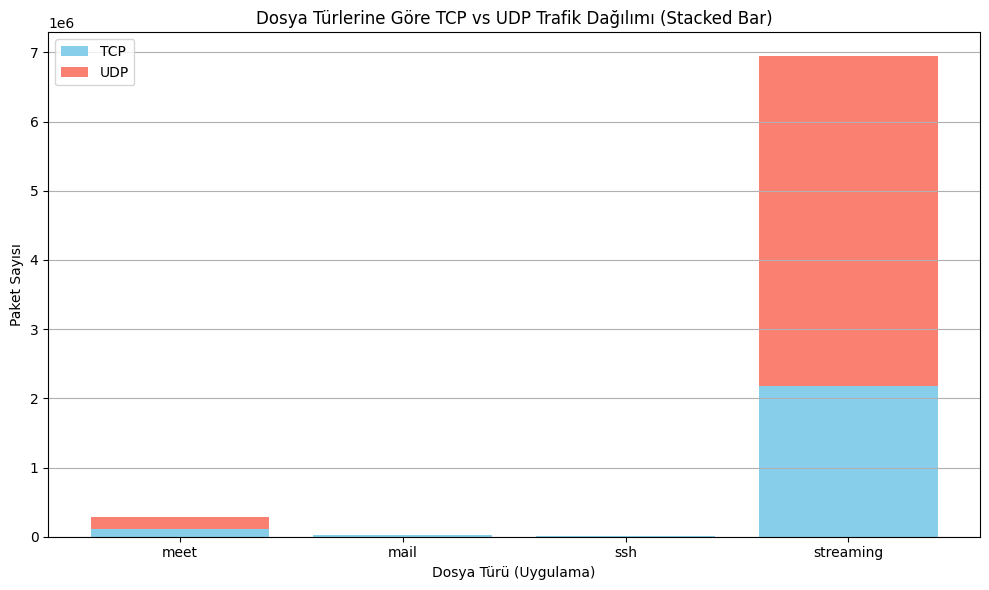

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

# === HER DOSYA İÇİN TCP vs UDP SAYILARI ===
# file_name -> {'tcp': x, 'udp': y}
proto_counts = {ft.replace('.json', ''): {'tcp': 0, 'udp': 0} for ft in file_types}

for vpn in vpn_types:
    for file_name in file_types:
        short_name = file_name.replace('.json', '')
        if short_name not in proto_counts:
            proto_counts[short_name] = {'tcp': 0, 'udp': 0}

        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        if not os.path.isfile(full_path):
            continue

        try:
            with open(full_path) as f:
                data = json.load(f)

                for session in data:
                    proto = session.get("ip_proto", "").lower()
                    if proto in ['tcp', 'udp']:
                        count = len(session.get("x_packets", []))
                        proto_counts[short_name][proto] += count
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
labels = list(proto_counts.keys())
tcp_counts = [proto_counts[label]['tcp'] for label in labels]
udp_counts = [proto_counts[label]['udp'] for label in labels]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, tcp_counts, label='TCP', color='skyblue')
plt.bar(x, udp_counts, bottom=tcp_counts, label='UDP', color='salmon')

plt.xticks(x, labels)
plt.title('Dosya Türlerine Göre TCP vs UDP Trafik Dağılımı (Stacked Bar)')
plt.xlabel('Dosya Türü (Uygulama)')
plt.ylabel('Paket Sayısı')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


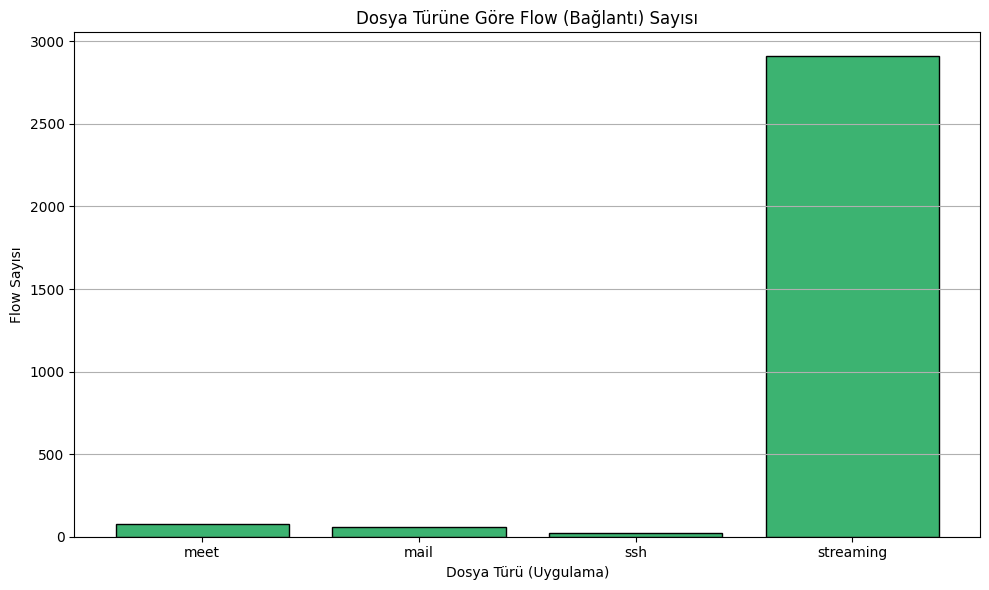

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === AYARLAR ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

# === HER DOSYA İÇİN FLOW SAYISI ===
# file_name -> flow sayısı
flow_counts = defaultdict(set)

for vpn in vpn_types:
    for file_name in file_types:
        short_name = file_name.replace('.json', '')
        if vpn == 'Non VPN':
            full_path = os.path.join(base_path, vpn, file_name)
        else:
            full_path = os.path.join(base_path, 'VPN', vpn, file_name)

        if not os.path.isfile(full_path):
            continue

        try:
            with open(full_path) as f:
                data = json.load(f)

                for session in data:
                    proto = session.get("ip_proto", "unknown").lower()
                    src_port = session.get("port_src")
                    dst_port = session.get("port_dst")

                    if src_port is not None and dst_port is not None:
                        flow_id = (proto, src_port, dst_port)
                        flow_counts[short_name].add(flow_id)
        except Exception as e:
            print(f"Hata ({vpn}/{file_name}):", e)

# === GRAFİK ===
labels = list(flow_counts.keys())
flow_numbers = [len(flow_counts[label]) for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, flow_numbers, color='mediumseagreen', edgecolor='black')
plt.title('Dosya Türüne Göre Flow (Bağlantı) Sayısı')
plt.xlabel('Dosya Türü (Uygulama)')
plt.ylabel('Flow Sayısı')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


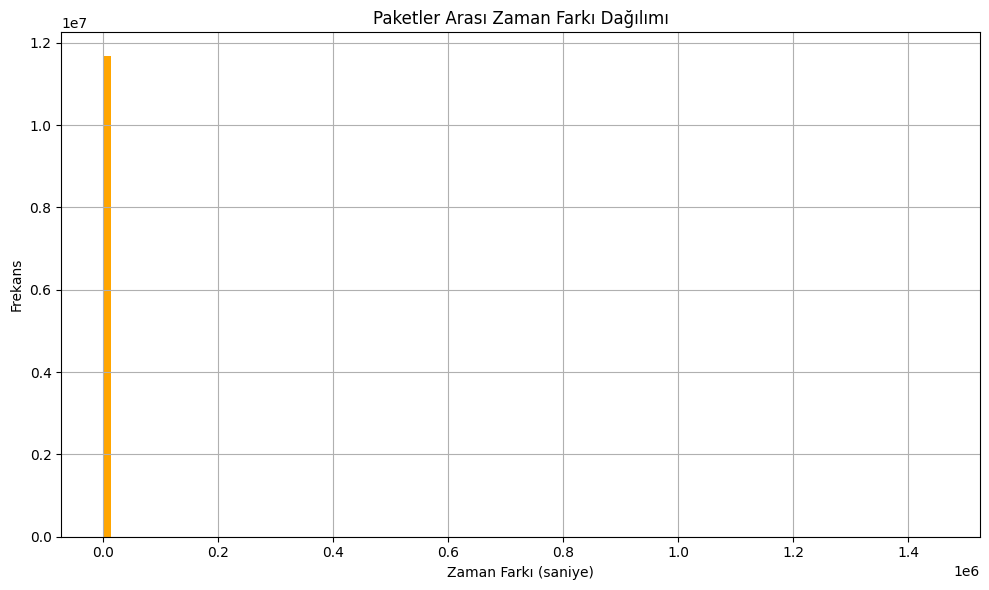

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime

base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

timestamps = []

for vpn in vpn_types:
    for file_name in file_types:
        full_path = os.path.join(base_path, vpn, file_name) if vpn == 'Non VPN' else os.path.join(base_path, 'VPN', vpn, file_name)
        if not os.path.isfile(full_path):
            continue
        try:
            with open(full_path) as f:
                data = json.load(f)
                for session in data:
                    for packet in session.get('x_packets', []):
                        ts = packet.get("timestamp_start")
                        if ts:
                            timestamps.append(datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f"))
        except:
            continue

timestamps.sort()
diffs = [(timestamps[i+1] - timestamps[i]).total_seconds() for i in range(len(timestamps)-1)]

plt.figure(figsize=(10,6))
plt.hist(diffs, bins=100, color='orange')
plt.title("Paketler Arası Zaman Farkı Dağılımı")
plt.xlabel("Zaman Farkı (saniye)")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()


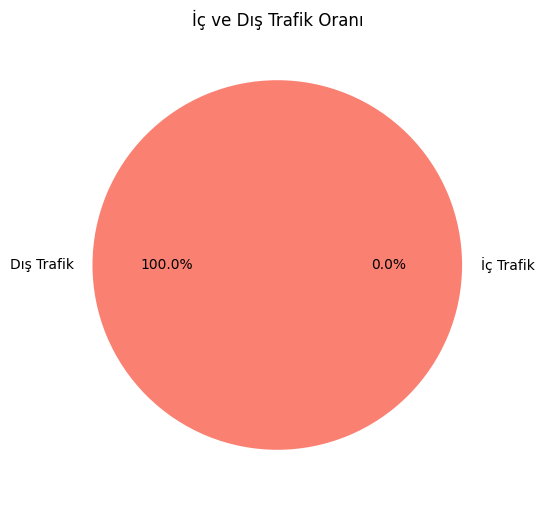

In [ ]:
import os
import json
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

internal = 0
external = 0

for vpn in vpn_types:
    for file_name in file_types:
        full_path = os.path.join(base_path, vpn, file_name) if vpn == 'Non VPN' else os.path.join(base_path, 'VPN', vpn, file_name)
        if not os.path.isfile(full_path):
            continue
        try:
            with open(full_path) as f:
                data = json.load(f)
                for session in data:
                    src_ip = session.get("ip_src", "")
                    dst_ip = session.get("ip_dst", "")
                    if src_ip.startswith("192.168") or dst_ip.startswith("192.168"):
                        internal += 1
                    else:
                        external += 1
        except:
            continue

plt.figure(figsize=(6, 6))
plt.pie([internal, external], labels=["İç Trafik", "Dış Trafik"], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("İç ve Dış Trafik Oranı")
plt.show()


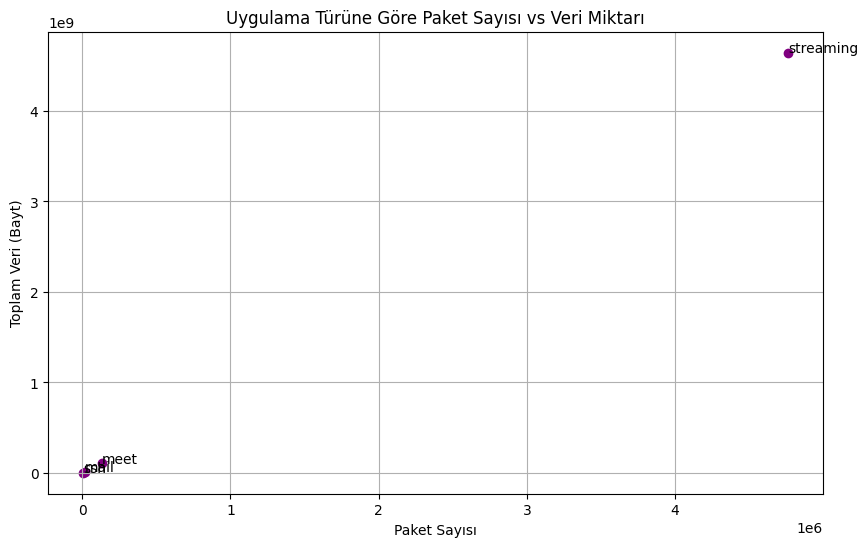

In [ ]:
import os
import json
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

packet_counts = {}
byte_totals = {}

for vpn in vpn_types:
    for file_name in file_types:
        short_name = file_name.replace('.json', '')
        packet_counts.setdefault(short_name, 0)
        byte_totals.setdefault(short_name, 0)

        full_path = os.path.join(base_path, vpn, file_name) if vpn == 'Non VPN' else os.path.join(base_path, 'VPN', vpn, file_name)
        if not os.path.isfile(full_path):
            continue

        try:
            with open(full_path) as f:
                data = json.load(f)
                for session in data:
                    for packet in session.get('x_packets', []):
                        try:
                            size = int(packet["bytes"])
                            if size > 0:
                                packet_counts[short_name] += 1
                                byte_totals[short_name] += size
                        except:
                            continue
        except:
            continue

x = [packet_counts[k] for k in packet_counts]
y = [byte_totals[k] for k in byte_totals]
labels = list(packet_counts.keys())

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='purple')
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label)
plt.title("Uygulama Türüne Göre Paket Sayısı vs Veri Miktarı")
plt.xlabel("Paket Sayısı")
plt.ylabel("Toplam Veri (Bayt)")
plt.grid(True)
plt.show()


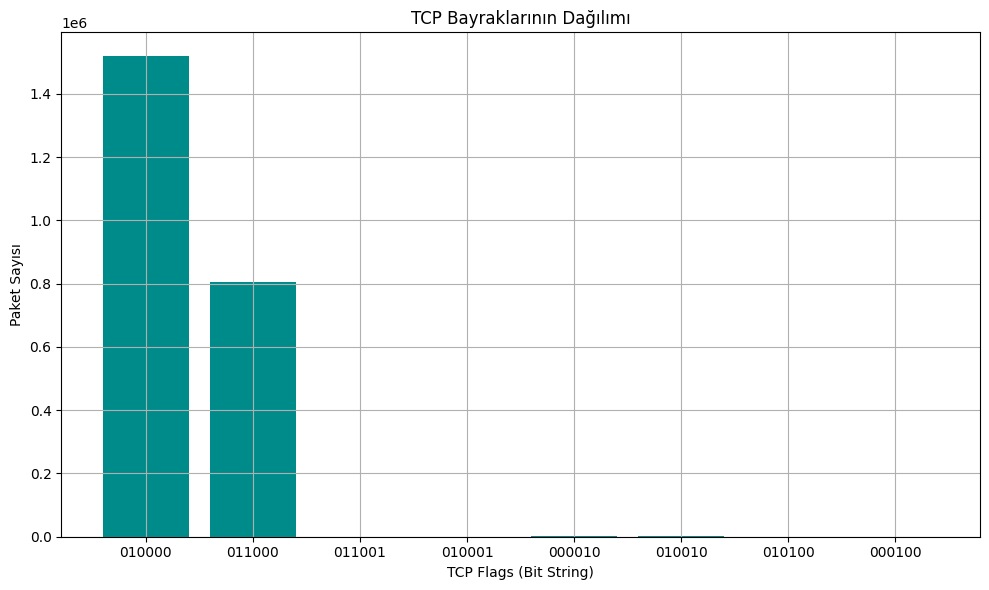

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

flag_counter = Counter()

for vpn in vpn_types:
    for file_name in file_types:
        full_path = os.path.join(base_path, vpn, file_name) if vpn == 'Non VPN' else os.path.join(base_path, 'VPN', vpn, file_name)
        if not os.path.isfile(full_path):
            continue
        try:
            with open(full_path) as f:
                data = json.load(f)
                for session in data:
                    if session.get("ip_proto") != "tcp":
                        continue
                    for packet in session.get("x_packets", []):
                        flag = packet.get("tcp_flags")
                        if flag:
                            flag_counter[flag] += 1
        except:
            continue

plt.figure(figsize=(10,6))
plt.bar(flag_counter.keys(), flag_counter.values(), color='darkcyan')
plt.title("TCP Bayraklarının Dağılımı")
plt.xlabel("TCP Flags (Bit String)")
plt.ylabel("Paket Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()


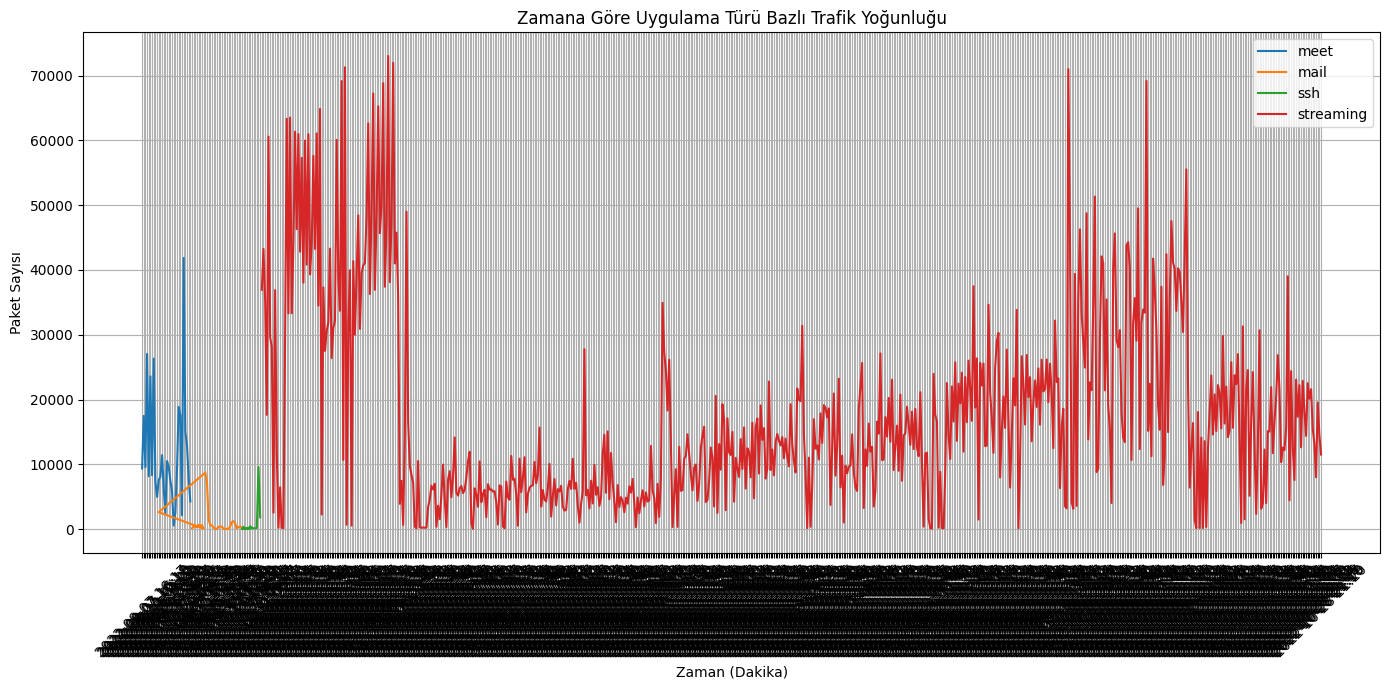

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_types = ['Non VPN', 'OpenVPN', 'WireGuard', 'SSTP', 'L2TP', 'L2TP IPsec', 'PPTP']
file_types = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

time_series = defaultdict(lambda: defaultdict(int))

for vpn in vpn_types:
    for file_name in file_types:
        short_name = file_name.replace('.json', '')
        full_path = os.path.join(base_path, vpn, file_name) if vpn == 'Non VPN' else os.path.join(base_path, 'VPN', vpn, file_name)
        if not os.path.isfile(full_path):
            continue
        try:
            with open(full_path) as f:
                data = json.load(f)
                for session in data:
                    for packet in session.get('x_packets', []):
                        ts = packet.get("timestamp_start")
                        if not ts:
                            continue
                        dt = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f")
                        key = dt.strftime("%Y-%m-%d %H:%M")
                        time_series[short_name][key] += 1
        except:
            continue

plt.figure(figsize=(14,7))
for app, ts_data in time_series.items():
    sorted_ts = sorted(ts_data.items())
    times = [t[0] for t in sorted_ts]
    values = [t[1] for t in sorted_ts]
    plt.plot(times, values, label=app)

plt.title("Zamana Göre Uygulama Türü Bazlı Trafik Yoğunluğu")
plt.xlabel("Zaman (Dakika)")
plt.ylabel("Paket Sayısı")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd

# === Ayarlar ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_folders = ['SSTP', 'OpenVPN', 'PPTP', 'L2TP', 'WireGuard', 'L2TP IPsec']
file_names = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

data = []

# VPN klasörlerini tara
for folder in vpn_folders:
    for file_name in file_names:
        path = os.path.join(base_path, 'VPN', folder, file_name)
        if not os.path.isfile(path):
            continue
        with open(path) as f:
            try:
                sessions = json.load(f)
                for session in sessions:
                    proto = session.get("ip_proto", "").lower()
                    for packet in session.get("x_packets", []):
                        try:
                            data.append({
                                "bytes": int(packet.get("bytes", 0)),
                                "ip_proto": 1 if proto == "tcp" else 0,  # TCP=1, UDP=0
                                "port_src": session.get("port_src", -1),
                                "port_dst": session.get("port_dst", -1),
                                "tcp_flags": int(packet.get("tcp_flags", "000000"), 2) if proto == "tcp" else 0,
                                "tcp_header_len": int(packet.get("tcp_header_len", 0)) if proto == "tcp" else 0,
                                "vpn": 1
                            })
                        except:
                            continue
            except:
                continue

# Non VPN dosyalarını tara
non_vpn_path = os.path.join(base_path, 'Non VPN')
for file_name in file_names:
    path = os.path.join(non_vpn_path, file_name)
    if not os.path.isfile(path):
        continue
    with open(path) as f:
        try:
            sessions = json.load(f)
            for session in sessions:
                proto = session.get("ip_proto", "").lower()
                for packet in session.get("x_packets", []):
                    try:
                        data.append({
                            "bytes": int(packet.get("bytes", 0)),
                            "ip_proto": 1 if proto == "tcp" else 0,
                            "port_src": session.get("port_src", -1),
                            "port_dst": session.get("port_dst", -1),
                            "tcp_flags": int(packet.get("tcp_flags", "000000"), 2) if proto == "tcp" else 0,
                            "tcp_header_len": int(packet.get("tcp_header_len", 0)) if proto == "tcp" else 0,
                            "vpn": 0
                        })
                    except:
                        continue
        except:
            continue

# DataFrame oluştur
df = pd.DataFrame(data)
df.head()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Negatif bytes değerlerini temizle
df = df[df['bytes'] >= 0]

# Özellikler ve hedef değişken
X = df.drop(columns=['vpn'])
y = df['vpn']

# Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test tahmini
y_pred = model.predict(X_test)

# Skorlar
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Modeli kaydet
joblib.dump(model, 'vpn_detection_model.pkl')


✅ Accuracy: 0.9628987563142026

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93    256054
           1       0.99      0.96      0.97    728037

    accuracy                           0.96    984091
   macro avg       0.94      0.97      0.95    984091
weighted avg       0.97      0.96      0.96    984091


🧩 Confusion Matrix:
 [[249910   6144]
 [ 30367 697670]]


['vpn_detection_model.pkl']

In [ ]:
import joblib

# Eğitilmiş modeli yükle
model = joblib.load('vpn_detection_model.pkl')


In [ ]:
import pandas as pd

sample_dict = {
    "bytes": [169],
    "ip_proto": [1],
    "port_src": [52538],
    "port_dst": [443],
    "tcp_flags": [11000],
    "tcp_header_len": [32]
}

sample_df = pd.DataFrame(sample_dict)
prediction = model.predict(sample_df)

print("🔍 VPN Kullanılıyor mu?:", "EVET (1)" if prediction[0] == 1 else "HAYIR (0)")


🔍 VPN Kullanılıyor mu?: EVET (1)


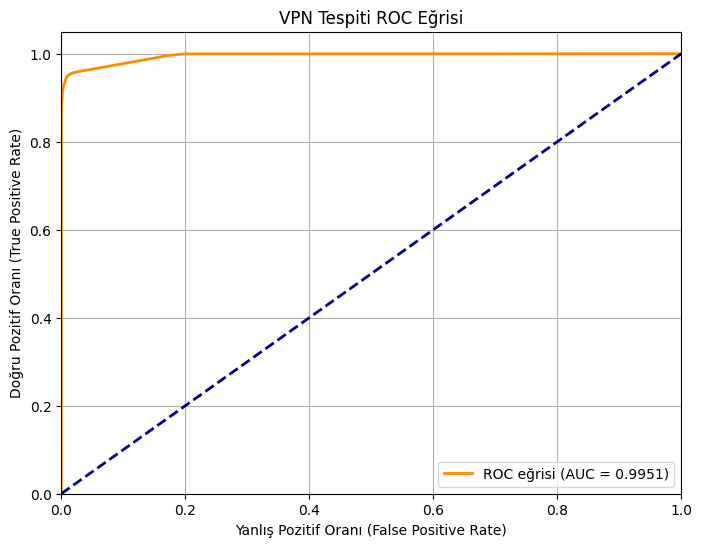

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Modelin pozitif sınıfa (vpn=1) ait tahmin olasılıkları
y_probs = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için değerler
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Grafiği çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC eğrisi (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # rastgele sınıflandırıcı çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('VPN Tespiti ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# === Ayarlar ===
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset/VPN'
vpn_folders = ['L2TP', 'L2TP IPsec', 'PPTP', 'SSTP', 'WireGuard', 'OpenVPN']
file_names = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

data = []

# VPN klasörlerinden veri oku
for folder in vpn_folders:
    for file_name in file_names:
        path = os.path.join(base_path, folder, file_name)
        if not os.path.isfile(path):
            continue
        with open(path) as f:
            try:
                sessions = json.load(f)
                for session in sessions:
                    proto = session.get("ip_proto", "").lower()
                    for packet in session.get("x_packets", []):
                        try:
                            data.append({
                                "bytes": int(packet.get("bytes", 0)),
                                "ip_proto": 1 if proto == "tcp" else 0,
                                "port_src": session.get("port_src", -1),
                                "port_dst": session.get("port_dst", -1),
                                "tcp_flags": int(packet.get("tcp_flags", "000000"), 2) if proto == "tcp" else 0,
                                "tcp_header_len": int(packet.get("tcp_header_len", 0)) if proto == "tcp" else 0,
                                "vpn_type": folder
                            })
                        except:
                            continue
            except:
                continue

# DataFrame oluştur
df = pd.DataFrame(data)
df = df[df['bytes'] >= 0]

# VPN türünü sayısal etiketle
le = LabelEncoder()
df['vpn_type_encoded'] = le.fit_transform(df['vpn_type'])

# Özellikler ve hedef
X = df[['bytes', 'ip_proto', 'port_src', 'port_dst', 'tcp_flags', 'tcp_header_len']]
y = df['vpn_type_encoded']

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hızlı GridSearch ayarları
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_model = grid_search.best_estimator_

# Değerlendirme
y_pred = best_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Model ve etiket çözücüyü kaydet
joblib.dump(best_model, 'vpn_protocol_classifier.pkl')
joblib.dump(le, 'vpn_label_encoder.pkl')


✅ Accuracy: 0.9998599126239327

📊 Classification Report:
               precision    recall  f1-score   support

        L2TP       1.00      1.00      1.00     87041
  L2TP IPsec       1.00      1.00      1.00     87095
     OpenVPN       1.00      1.00      1.00     85001
        PPTP       1.00      1.00      1.00    262033
        SSTP       1.00      1.00      1.00     89087
   WireGuard       1.00      1.00      1.00    117860

    accuracy                           1.00    728117
   macro avg       1.00      1.00      1.00    728117
weighted avg       1.00      1.00      1.00    728117


🧩 Confusion Matrix:
 [[ 87035      6      0      0      0      0]
 [     0  87095      0      0      0      0]
 [     0      0  85001      0      0      0]
 [     0      0      0 262033      0      0]
 [     0      0      0      0  89087      0]
 [     0     96      0      0      0 117764]]


['vpn_label_encoder.pkl']

In [ ]:
import joblib
import pandas as pd

# Eğitilmiş model ve label encoder'ı yükle
model = joblib.load('vpn_protocol_classifier.pkl')
label_encoder = joblib.load('vpn_label_encoder.pkl')

# Örnek giriş verisi: [bytes, ip_proto, port_src, port_dst, tcp_flags, tcp_header_len]
# TCP protokolü için örnek
sample_data = [[72, 1, 1723, 39794, 11000, 32]]  # TCP = ip_proto:1

# Girişi DataFrame'e çevir (özellik isimleri önemli!)
sample_df = pd.DataFrame(sample_data, columns=[
    'bytes', 'ip_proto', 'port_src', 'port_dst', 'tcp_flags', 'tcp_header_len'
])

# Tahmin yap
prediction = model.predict(sample_df)
predicted_label = label_encoder.inverse_transform(prediction)[0]

# Sonucu yazdır
print("🔍 Tahmin edilen VPN türü:", predicted_label)


🔍 Tahmin edilen VPN türü: PPTP


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


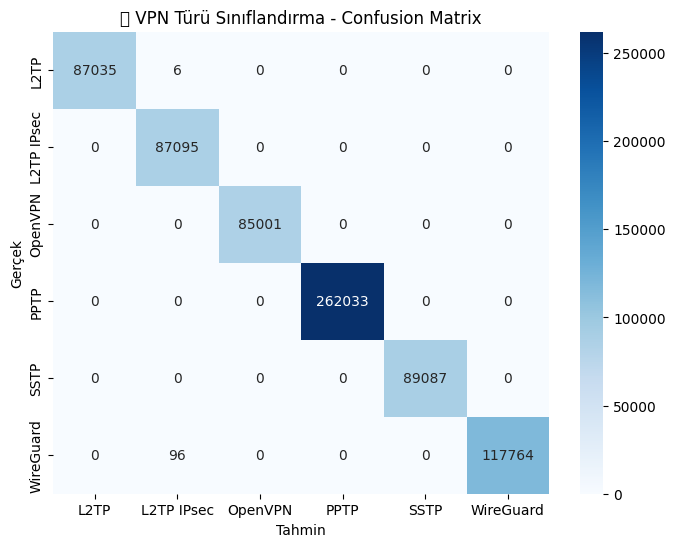

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tahmin ve gerçek etiketler
y_pred = model.predict(X_test)
labels = label_encoder.classes_

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('📊 VPN Türü Sınıflandırma - Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


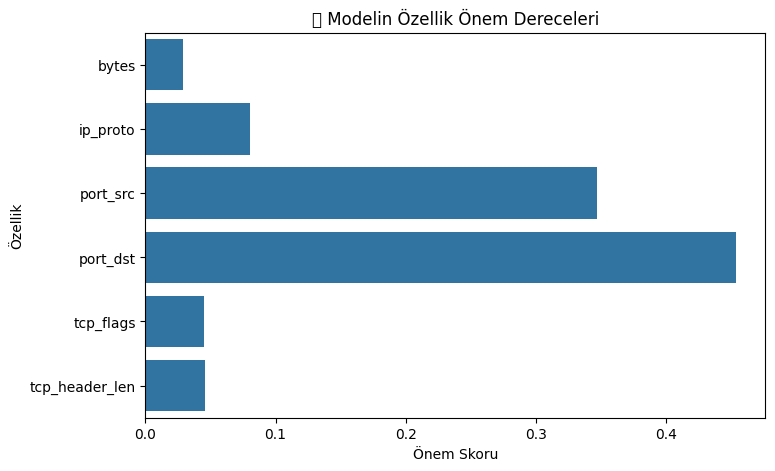

In [ ]:
# Özellik önemi
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("🧠 Modelin Özellik Önem Dereceleri")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


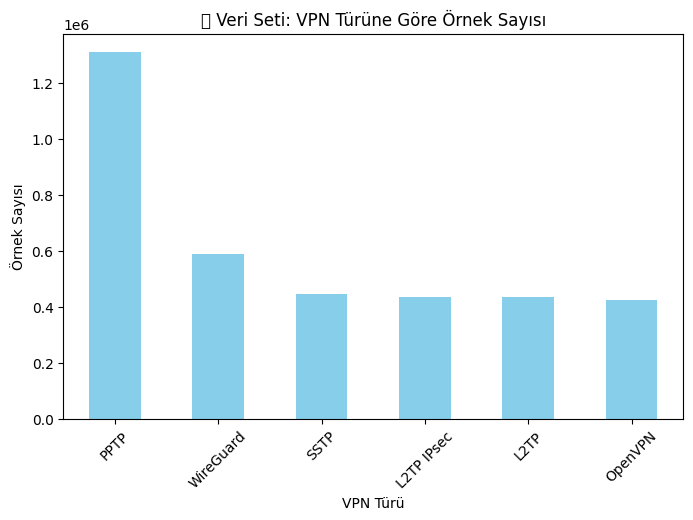

In [ ]:
plt.figure(figsize=(8, 5))
df['vpn_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("📊 Veri Seti: VPN Türüne Göre Örnek Sayısı")
plt.xlabel("VPN Türü")
plt.ylabel("Örnek Sayısı")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


In [ ]:
import joblib
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli yükle
model = joblib.load('/content/drive/MyDrive/Classroom/BigDataDersi/vpn_detection_model.pkl')

# === Aynı veri setini tekrar yükle (test seti için)
base_path = '/content/drive/MyDrive/Classroom/BigDataDersi/my_dataset'
vpn_folders = ['SSTP', 'OpenVPN', 'PPTP', 'L2TP', 'WireGuard', 'L2TP IPsec']
file_names = ['meet.json', 'mail.json', 'ssh.json', 'streaming.json']

data = []

# VPN verileri
for folder in vpn_folders:
    for file_name in file_names:
        path = os.path.join(base_path, 'VPN', folder, file_name)
        if os.path.isfile(path):
            with open(path) as f:
                try:
                    sessions = json.load(f)
                    for session in sessions:
                        proto = session.get("ip_proto", "").lower()
                        for packet in session.get("x_packets", []):
                            try:
                                data.append({
                                    "bytes": int(packet.get("bytes", 0)),
                                    "ip_proto": 1 if proto == "tcp" else 0,
                                    "port_src": session.get("port_src", -1),
                                    "port_dst": session.get("port_dst", -1),
                                    "tcp_flags": int(packet.get("tcp_flags", "000000"), 2) if proto == "tcp" else 0,
                                    "tcp_header_len": int(packet.get("tcp_header_len", 0)) if proto == "tcp" else 0,
                                    "vpn": 1
                                })
                            except:
                                continue
                except:
                    continue

# Non-VPN verileri
non_vpn_path = os.path.join(base_path, 'Non VPN')
for file_name in file_names:
    path = os.path.join(non_vpn_path, file_name)
    if os.path.isfile(path):
        with open(path) as f:
            try:
                sessions = json.load(f)
                for session in sessions:
                    proto = session.get("ip_proto", "").lower()
                    for packet in session.get("x_packets", []):
                        try:
                            data.append({
                                "bytes": int(packet.get("bytes", 0)),
                                "ip_proto": 1 if proto == "tcp" else 0,
                                "port_src": session.get("port_src", -1),
                                "port_dst": session.get("port_dst", -1),
                                "tcp_flags": int(packet.get("tcp_flags", "000000"), 2) if proto == "tcp" else 0,
                                "tcp_header_len": int(packet.get("tcp_header_len", 0)) if proto == "tcp" else 0,
                                "vpn": 0
                            })
                        except:
                            continue
            except:
                continue

# DataFrame oluştur ve ayır
df = pd.DataFrame(data)
df = df[df['bytes'] >= 0]

X = df.drop(columns=['vpn'])
y = df['vpn']

# Test setini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model ile tahmin yap
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


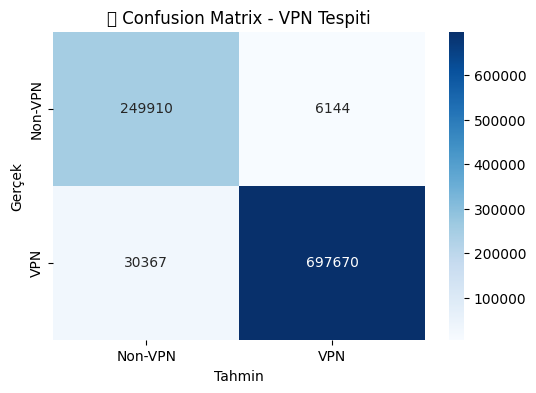

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-VPN', 'VPN'],
            yticklabels=['Non-VPN', 'VPN'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('🔐 Confusion Matrix - VPN Tespiti')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


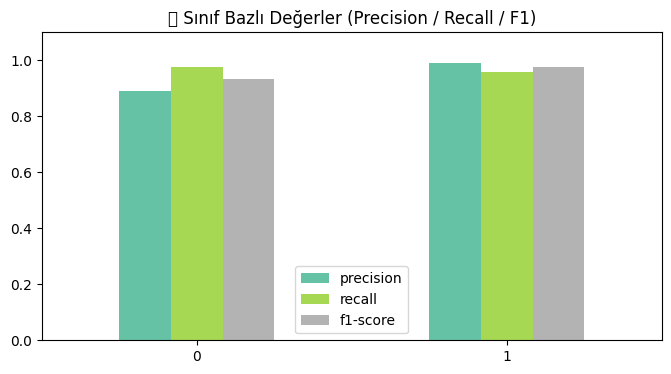

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Raporu DataFrame'e çevir
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Bar plot
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 4), colormap='Set2')
plt.title("📊 Sınıf Bazlı Değerler (Precision / Recall / F1)")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


<ipython-input-38-482b39c5b553>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


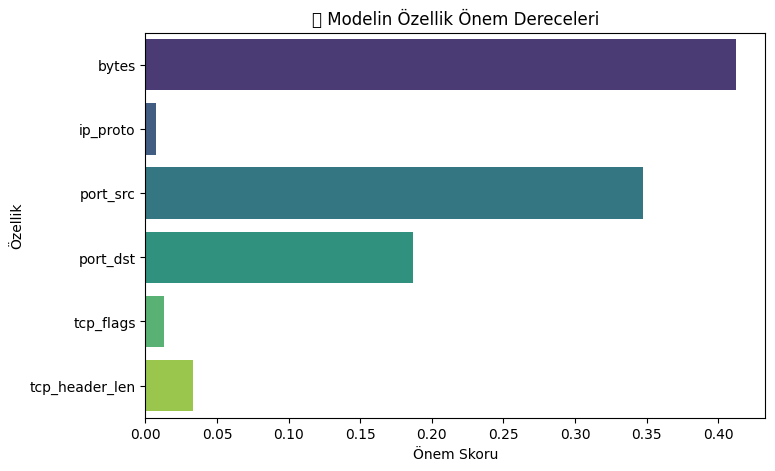

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("🧠 Modelin Özellik Önem Dereceleri")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.grid(False)
plt.show()
